In [83]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [84]:
from keras.preprocessing import image

In [85]:
dataset = os.listdir('./images/')

In [86]:
label = 0
mapping = {}
for i in dataset:
    mapping[i] = label
    label += 1
print(mapping)    

{'dogs': 0, 'horses': 1, 'humans': 2, 'cats': 3}


In [87]:
images_data = []
labels = []

In [88]:
for images in dataset:
    curr_path = os.listdir('./images/'+str(images))
    
    for i in curr_path:
        img = image.load_img('./images/'+str(images)+'/'+i,target_size=(50,50))
        images_data.append(image.img_to_array(img))
        labels.append(mapping[images])

In [89]:
images_data = np.array(images_data,dtype='float32')/255
labels = np.array(labels)

In [90]:
print(images_data.shape)
print(labels.shape)

(808, 50, 50, 3)
(808,)


In [91]:
zipped = list(zip(images_data,labels))

In [92]:
np.random.shuffle(zipped)

In [93]:
images_data,labels = zip(*zipped)
images_data = np.array(images_data)
labels = np.array(labels)

In [94]:
print(images_data.shape)
print(labels.shape)

(808, 50, 50, 3)
(808,)


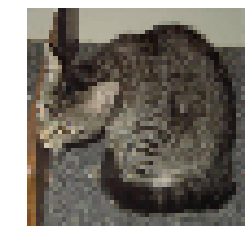

3


In [95]:
plt.imshow(images_data[673])
plt.axis("off")
plt.show()
print(labels[673])

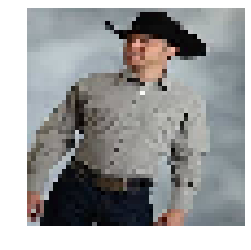

2


In [96]:
plt.imshow(images_data[23])
plt.axis("off")
plt.show()
print(labels[23])

In [97]:
class SVM:
    
    def __init__(self,c=1):
        self.c = c
        self.w = 0
        self.b = 0
        
    def hingeLoss(self,X,Y,w,b):
        
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)
        c = self.c
        
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(w,X[i])+b)
            loss += c*max(0,1-ti)
            
        return loss

    def fit(self,X,Y,batch_size=32,learning_rate=0.01,max_iteration=200):
        
        no_of_examples = X.shape[0]
        no_of_features = X.shape[1]
        
        losses = []
        w = np.zeros((1,no_of_features))
        b = 0
        c = self.c
        
        for itr in range(max_iteration):
            
            loss = self.hingeLoss(X,Y,w,b)
            losses.append(loss)
            idx = np.arange(0,no_of_examples)
            np.random.shuffle(idx)
            
            for mini_batch in range(0,no_of_examples,batch_size):
                
                gradew = 0
                gradeb = 0
                
                for j in range(mini_batch,mini_batch+batch_size):
                    
                    if j<no_of_examples:
                        
                        i = idx[j]
                        ti = Y[i]*(np.dot(w,X[i])+b)
                        
                        if ti>1:
                            gradew += 0
                            gradeb += 0
                            
                        else:
                            gradew += c*X[i]*Y[i]
                            gradeb += c*Y[i]
                
                w = w - learning_rate*w + learning_rate*gradew
                b = b + learning_rate*gradeb
        
        self.b = b
        self.w = w
        
        return losses

In [98]:
classes = len(np.unique(labels))

In [99]:
def classWiseData(x,y):
    
    data = {}
    
    ## initialise empty lists for the class labels
    for i in range(classes):
        data[i] = []
    ## add the different images to the list corresponding to their label     
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    ## converts those lists to numpy arrays
    for i in data.keys():
        data[i] = np.array(data[i],dtype='float32')
    
    return data

In [100]:
images_data = images_data.reshape((images_data.shape[0],-1))

In [101]:
print(images_data.shape)

(808, 7500)


In [102]:
data = classWiseData(images_data,labels)

In [103]:
data.keys()

dict_keys([0, 1, 2, 3])

In [104]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)

(202, 7500)
(202, 7500)
(202, 7500)
(202, 7500)


In [105]:
def getDataPairforSVM(d1,d2):
    
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

In [106]:
svm = SVM()
p,l = getDataPairforSVM(data[0],data[1])

In [107]:
def trainSVM():
    
    svm_classifiers = {}
    for i in range(classes):
        svm_classifiers[i] = {}
        for j in range(i+1,classes):
            x_pair,y_pair = getDataPairforSVM(data[i],data[j])
            loss = svm.fit(x_pair,y_pair)
            weights = svm.w
            biases = svm.b
            svm_classifiers[i][j] = weights,biases
    return svm_classifiers        

In [108]:
classifiers = trainSVM()

In [109]:
classifiers

{0: {1: (array([[-0.05490041,  0.084568  ,  0.30917276, ...,  0.21209133,
            0.18459476, -0.34435187]]), -18.62000000000005),
  2: (array([[0.32515074, 0.35012331, 0.38702712, ..., 0.40356025, 0.42232011,
           0.24119565]]), -8.269999999999996),
  3: (array([[ 0.0015611 , -0.21908151, -0.14138809, ...,  0.21230428,
            0.07916466,  0.23216418]]), 1.9300000000000006)},
 1: {2: (array([[0.29864317, 0.18417454, 0.11515457, ..., 0.25354892, 0.32554223,
           0.68045697]]), 12.709999999999996),
  3: (array([[ 0.01524167, -0.31885995, -0.43184051, ..., -0.04899496,
           -0.19488958,  0.38776551]]), 21.180000000000017)},
 2: {3: (array([[-0.29745709, -0.52496566, -0.54782795, ..., -0.26014734,
           -0.42055651, -0.1748348 ]]), 10.39000000000001)},
 3: {}}